In [1]:
import numpy as np
import pandas as pd

mallData = pd.read_csv('data.csv')

In [2]:
#Create Dataframe
df = pd.DataFrame(mallData)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mallDF = df.iloc[:, 3:5].values
mallDF[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [5]:
#Using K-Means Model
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans(init = "k-means++", n_clusters = i, random_state = 0)
    kmModel.fit(mallDF)
    wcss.append(kmModel.inertia_)

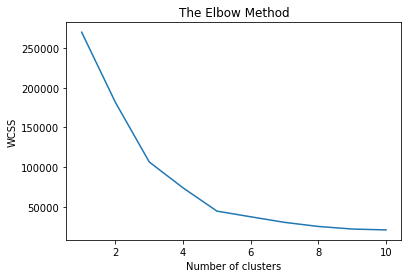

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range (1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show();

In [7]:
kmModel = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)

In [8]:
yPred = kmModel.fit_predict(mallDF)
yPred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [9]:
kmCenter = kmModel.cluster_centers_
kmCenter

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

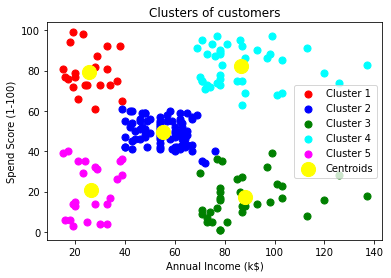

In [10]:
plt.figure(figsize=(6, 4))

plt.scatter(mallDF[yPred == 0, 0], mallDF[yPred == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(mallDF[yPred == 1, 0], mallDF[yPred == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(mallDF[yPred == 2, 0], mallDF[yPred == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(mallDF[yPred == 3, 0], mallDF[yPred == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(mallDF[yPred == 4, 0], mallDF[yPred == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmCenter[:,0], kmCenter[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()